# <span style="color:blue">Customer Segmentation for Targeted Marketing using Unsupervised Clustering</span>

In this project, we'll dive into the world of <span style="color:green">**customer segmentation**</span> using unsupervised clustering techniques on data from a grocery store's database. The goal is to group customers into segments based on their similarities, which can help us better understand and cater to their needs.

### Why Segment Customers?

- <span style="color:orange">**Optimize Customer Value**</span>: By dividing customers into segments, we can identify and enhance the value of each customer group to the business.
- <span style="color:purple">**Tailor Products**</span>: Understanding different customer segments allows us to adjust products and services to meet their unique needs and preferences.
- <span style="color:red">**Address Concerns**</span>: Segmentation helps in addressing the specific concerns and interests of various customer types, leading to improved satisfaction and loyalty.

### What We'll Do

1. <span style="color:blue">**Clustering Analysis**</span>: Apply unsupervised clustering techniques to identify distinct customer groups.
2. <span style="color:blue">**Segment Optimization**</span>: Optimize the business strategies based on the insights gained from these segments.
3. <span style="color:blue">**Customized Approaches**</span>: Modify product offerings and marketing strategies to better align with the characteristics of each customer segment.

Let's get started and uncover the insights that will help us enhance the shopping experience for our customers!


In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
import warnings
import sys

In [ ]:
#Loading the dataset
data = pd.read_csv("/content/sample_data/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Clusters', 'Total_Promos'],
      dtype='object')

# **Understanding Dataset**

## <span style="color:blue">Product Information</span>
- **Wines**: The amount of wine purchased.
- **Fruits**: The amount of fruit purchased.
- **Meat**: The amount of meat purchased.
- **Fish**: The amount of fish purchased.
- **Sweets**: The amount of sweets purchased.
- **Gold**: The amount of gold purchased.

## <span style="color:green">Promotion Data</span>
- **AcceptedCmp1**: Acceptance of the first promotional campaign.
- **AcceptedCmp2**: Acceptance of the second promotional campaign.
- **AcceptedCmp3**: Acceptance of the third promotional campaign.
- **AcceptedCmp4**: Acceptance of the fourth promotional campaign.
- **AcceptedCmp5**: Acceptance of the fifth promotional campaign.
- **Total_Promos**: Total number of promotions accepted by the customer.

## <span style="color:orange">Customer Information</span>
- **Education**: Customer’s level of education.
- **Income**: Customer’s annual income.
- **Kidhome**: Number of children in the household.
- **Teenhome**: Number of teenagers in the household.
- **Recency**: How recently the customer made their last purchase.
- **NumDealsPurchases**: Number of purchases made with a discount.
- **NumWebPurchases**: Number of purchases made online.
- **NumCatalogPurchases**: Number of purchases made from catalogs.
- **NumStorePurchases**: Number of purchases made in-store.
- **NumWebVisitsMonth**: Number of web visits per month.
- **Complain**: Whether the customer has complained or not.
- **Response**: Response to the marketing campaign.
- **Customer_For**: Length of time the customer has been with the company.
- **Age**: Age of the customer.
- **Spent**: Total amount spent by the customer.
- **Living_With**: Information on who the customer lives with.
- **Children**: Total number of children.
- **Family_Size**: Size of the customer’s family.
- **Is_Parent**: Whether the customer is a parent or not.

## <span style="color:red">Place Information</span>
- **Clusters**: The cluster assigned to the customer based on segmentation.

---

### <span style="color:purple">Summary</span>
This organization of columns helps you focus on different aspects of customer segmentation:

- **Product Information** helps in understanding what products are popular among different customer segments.
- **Promotion Data** provides insights into how customers respond to various promotions.
- **Customer Information** offers a detailed view of individual customer characteristics and behaviors.
- **Place Information** is crucial for identifying and analyzing customer segments.



# **Exploratory Data Analysis (EDA) Process**

I performed an in-depth EDA by inspecting the data, computing summary statistics, checking for missing values, and visualizing distributions and relationships. This helped me uncover patterns, detect outliers, and understand feature interactions to guide further analysis.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Data Cleaning Process**

I handled missing values, converted data types, removed duplicates, and corrected inconsistencies. I also addressed outliers, performed feature engineering, and normalized the data to ensure it was clean and ready for analysis.


In [ ]:
#removing null values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature **("Customer_For")** of the number of days the customers started to shop in the store relative to the last recorded date

In [ ]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


# **Feature Engineering Steps**
I’ll be enhancing the dataset with some new features:

- **Calculate Age**: Extract the **"Age"** of customers from the **"Year_Birth"** column.
- **Total Spending**: Create the **"Spent"** feature to sum up all amounts spent by customers across various categories.
- **Living Situation**: Derive the **"Living_With"** feature from **"Marital_Status"** to reflect living arrangements.
- **Children Count**: Create a **"Children"** feature to capture the total number of kids and teenagers in a household.
- **Family Size**: Introduce the **"Family_Size"** feature to indicate the total size of the family.
- **Parenthood Status**: Develop the **"Is_Parent"** feature to show whether a customer is a parent.
- **Simplify Education Levels**: Group **"Education"** into three categories for easier analysis.
- **Drop Redundant Features**: Remove some columns that are no longer needed.

These steps will help in creating a more informative and streamlined dataset for analysis.


In [ ]:
#Feature Engineering
#Age of customer today
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Now that we have some new features let's have a look at the data's stats.

In [ ]:
data.describe().transpose()

count          mean           std     min           25%  \
Income               2216.0  5.224725e+04  2.517308e+04  1730.0  3.530300e+04   
Kidhome              2216.0  4.417870e-01  5.368962e-01     0.0  0.000000e+00   
Teenhome             2216.0  5.054152e-01  5.441812e-01     0.0  0.000000e+00   
Recency              2216.0  4.901264e+01  2.894835e+01     0.0  2.400000e+01   
Wines                2216.0  3.050916e+02  3.373279e+02     0.0  2.400000e+01   
Fruits               2216.0  2.635605e+01  3.979392e+01     0.0  2.000000e+00   
Meat                 2216.0  1.669959e+02  2.242833e+02     0.0  1.600000e+01   
Fish                 2216.0  3.763764e+01  5.475208e+01     0.0  3.000000e+00   
Sweets               2216.0  2.702888e+01  4.107205e+01     0.0  1.000000e+00   
Gold                 2216.0  4.396525e+01  5.181541e+01     0.0  9.000000e+00   
NumDealsPurchases    2216.0  2.323556e+00  1.923716e+00     0.0  1.000000e+00   
NumWebPurchases      2216.0  4.085289e+00  2.740951e+00     0.0  2.000000e+00   
NumCatalogPurchases  2216.0  2.671029e+00  2.926734e+00     0.0  0.000000e+00   
NumStorePurchases    2216.0  5.800993e+00  3.250785e+00     0.0  3.000000e+00   
NumWebVisitsMonth    2216.0  5.319043e+00  2.425359e+00     0.0  3.000000e+00   
AcceptedCmp3         2216.0  7.355596e-02  2.611058e-01     0.0  0.000000e+00   
AcceptedCmp4         2216.0  7.400722e-02  2.618417e-01     0.0  0.000000e+00   
AcceptedCmp5         2216.0  7.310469e-02  2.603670e-01     0.0  0.000000e+00   
AcceptedCmp1         2216.0  6.407942e-02  2.449496e-01     0.0  0.000000e+00   
AcceptedCmp2         2216.0  1.353791e-02  1.155883e-01     0.0  0.000000e+00   
Complain             2216.0  9.476534e-03  9.690700e-02     0.0  0.000000e+00   
Response             2216.0  1.502708e-01  3.574173e-01     0.0  0.000000e+00   
Customer_For         2216.0  3.054423e+16  1.749036e+16     0.0  1.555200e+16   
Age                  2216.0  5.217960e+01  1.198555e+01    25.0  4.400000e+01   
Spent                2216.0  6.070754e+02  6.029005e+02     5.0  6.900000e+01   
Children             2216.0  9.472022e-01  7.490619e-01     0.0  0.000000e+00   
Family_Size          2216.0  2.592509e+00  9.057219e-01     1.0  2.000000e+00   
Is_Parent            2216.0  7.143502e-01  4.518253e-01     0.0  0.000000e+00   

                              50%           75%           max  
Income               5.138150e+04  6.852200e+04  6.666660e+05  
Kidhome              0.000000e+00  1.000000e+00  2.000000e+00  
Teenhome             0.000000e+00  1.000000e+00  2.000000e+00  
Recency              4.900000e+01  7.400000e+01  9.900000e+01  
Wines                1.745000e+02  5.050000e+02  1.493000e+03  
Fruits               8.000000e+00  3.300000e+01  1.990000e+02  
Meat                 6.800000e+01  2.322500e+02  1.725000e+03  
Fish                 1.200000e+01  5.000000e+01  2.590000e+02  
Sweets               8.000000e+00  3.300000e+01  2.620000e+02  
Gold                 2.450000e+01  5.600000e+01  3.210000e+02  
NumDealsPurchases    2.000000e+00  3.000000e+00  1.500000e+01  
NumWebPurchases      4.000000e+00  6.000000e+00  2.700000e+01  
NumCatalogPurchases  2.000000e+00  4.000000e+00  2.800000e+01  
NumStorePurchases    5.000000e+00  8.000000e+00  1.300000e+01  
NumWebVisitsMonth    6.000000e+00  7.000000e+00  2.000000e+01  
AcceptedCmp3         0.000000e+00  0.000000e+00  1.000000e+00  
AcceptedCmp4         0.000000e+00  0.000000e+00  1.000000e+00  
AcceptedCmp5         0.000000e+00  0.000000e+00  1.000000e+00  
AcceptedCmp1         0.000000e+00  0.000000e+00  1.000000e+00  
AcceptedCmp2         0.000000e+00  0.000000e+00  1.000000e+00  
Complain             0.000000e+00  0.000000e+00  1.000000e+00  
Response             0.000000e+00  0.000000e+00  1.000000e+00  
Customer_For         3.071520e+16  4.570560e+16  6.039360e+16  
Age                  5.100000e+01  6.200000e+01  1.280000e+02  
Spent                3.965000e+02  1.048000e+03  2.525000e+03  
Children

The above stats show some discrepancies in mean Income and Age and max Income and age.


Relative Plot Of Some Selected Features: A Data Subset


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

<Figure size 800x550 with 0 Axes>

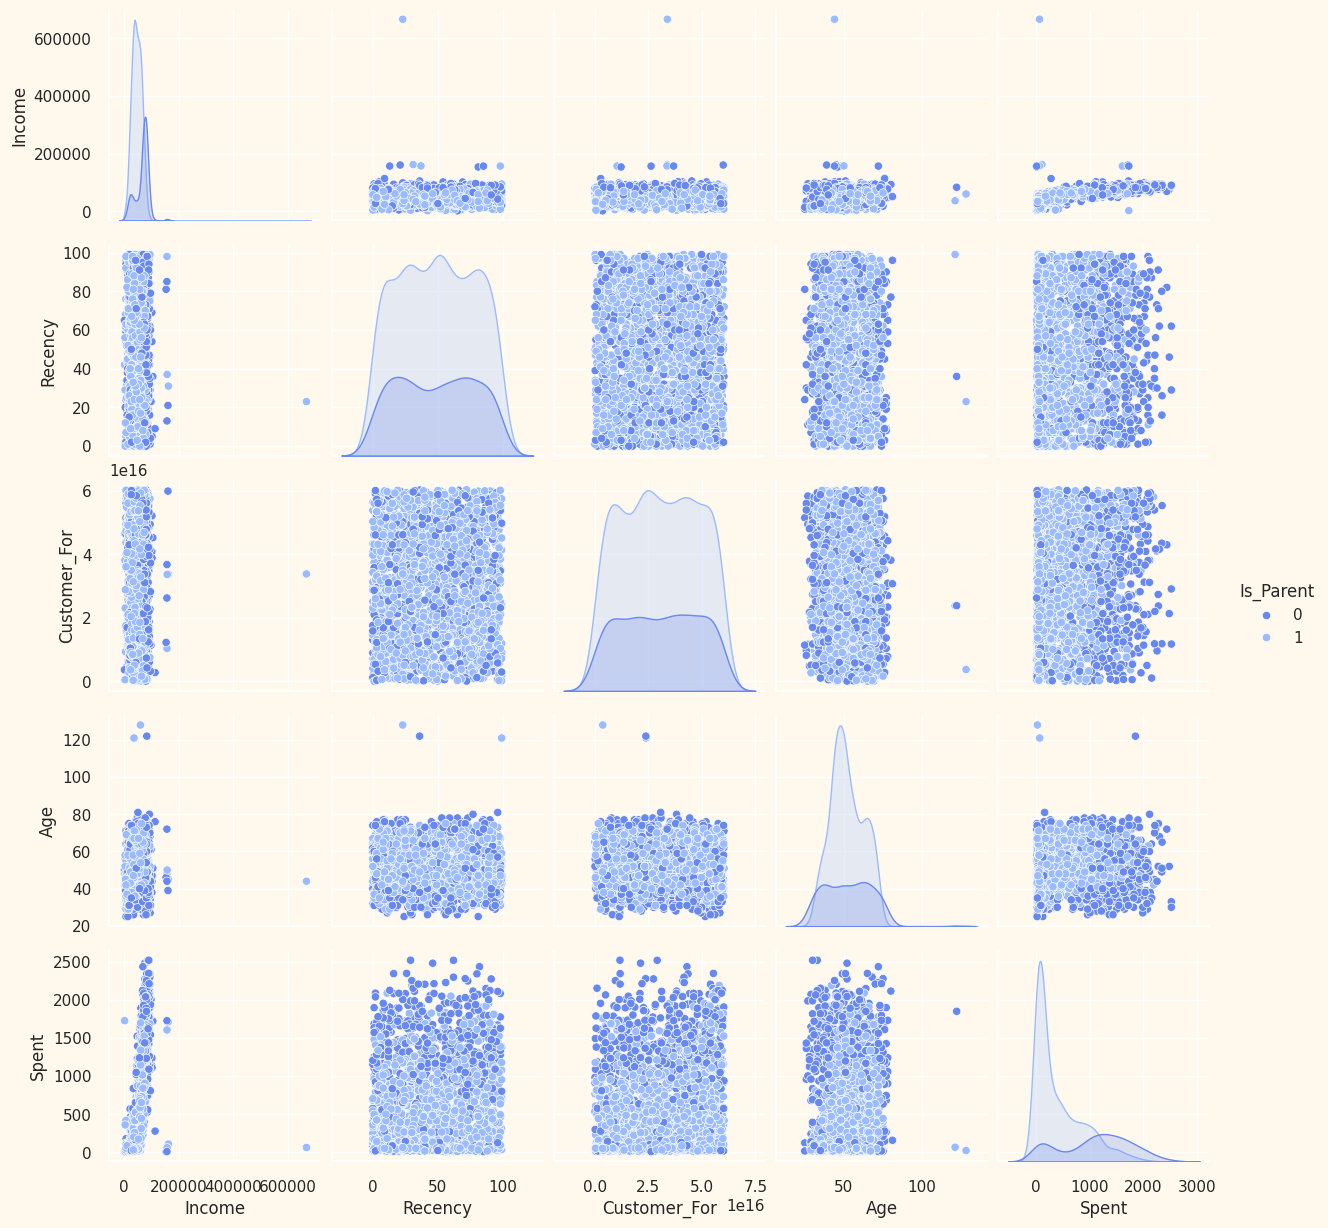

In [ ]:
import matplotlib.colors as mcolors

sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

palette = sns.color_palette("coolwarm", as_cmap=False)

# Plotting the features
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")

plt.figure()
sns.pairplot(data[To_Plot], hue="Is_Parent", palette=palette)
plt.show()


Handling Outliners

In [ ]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


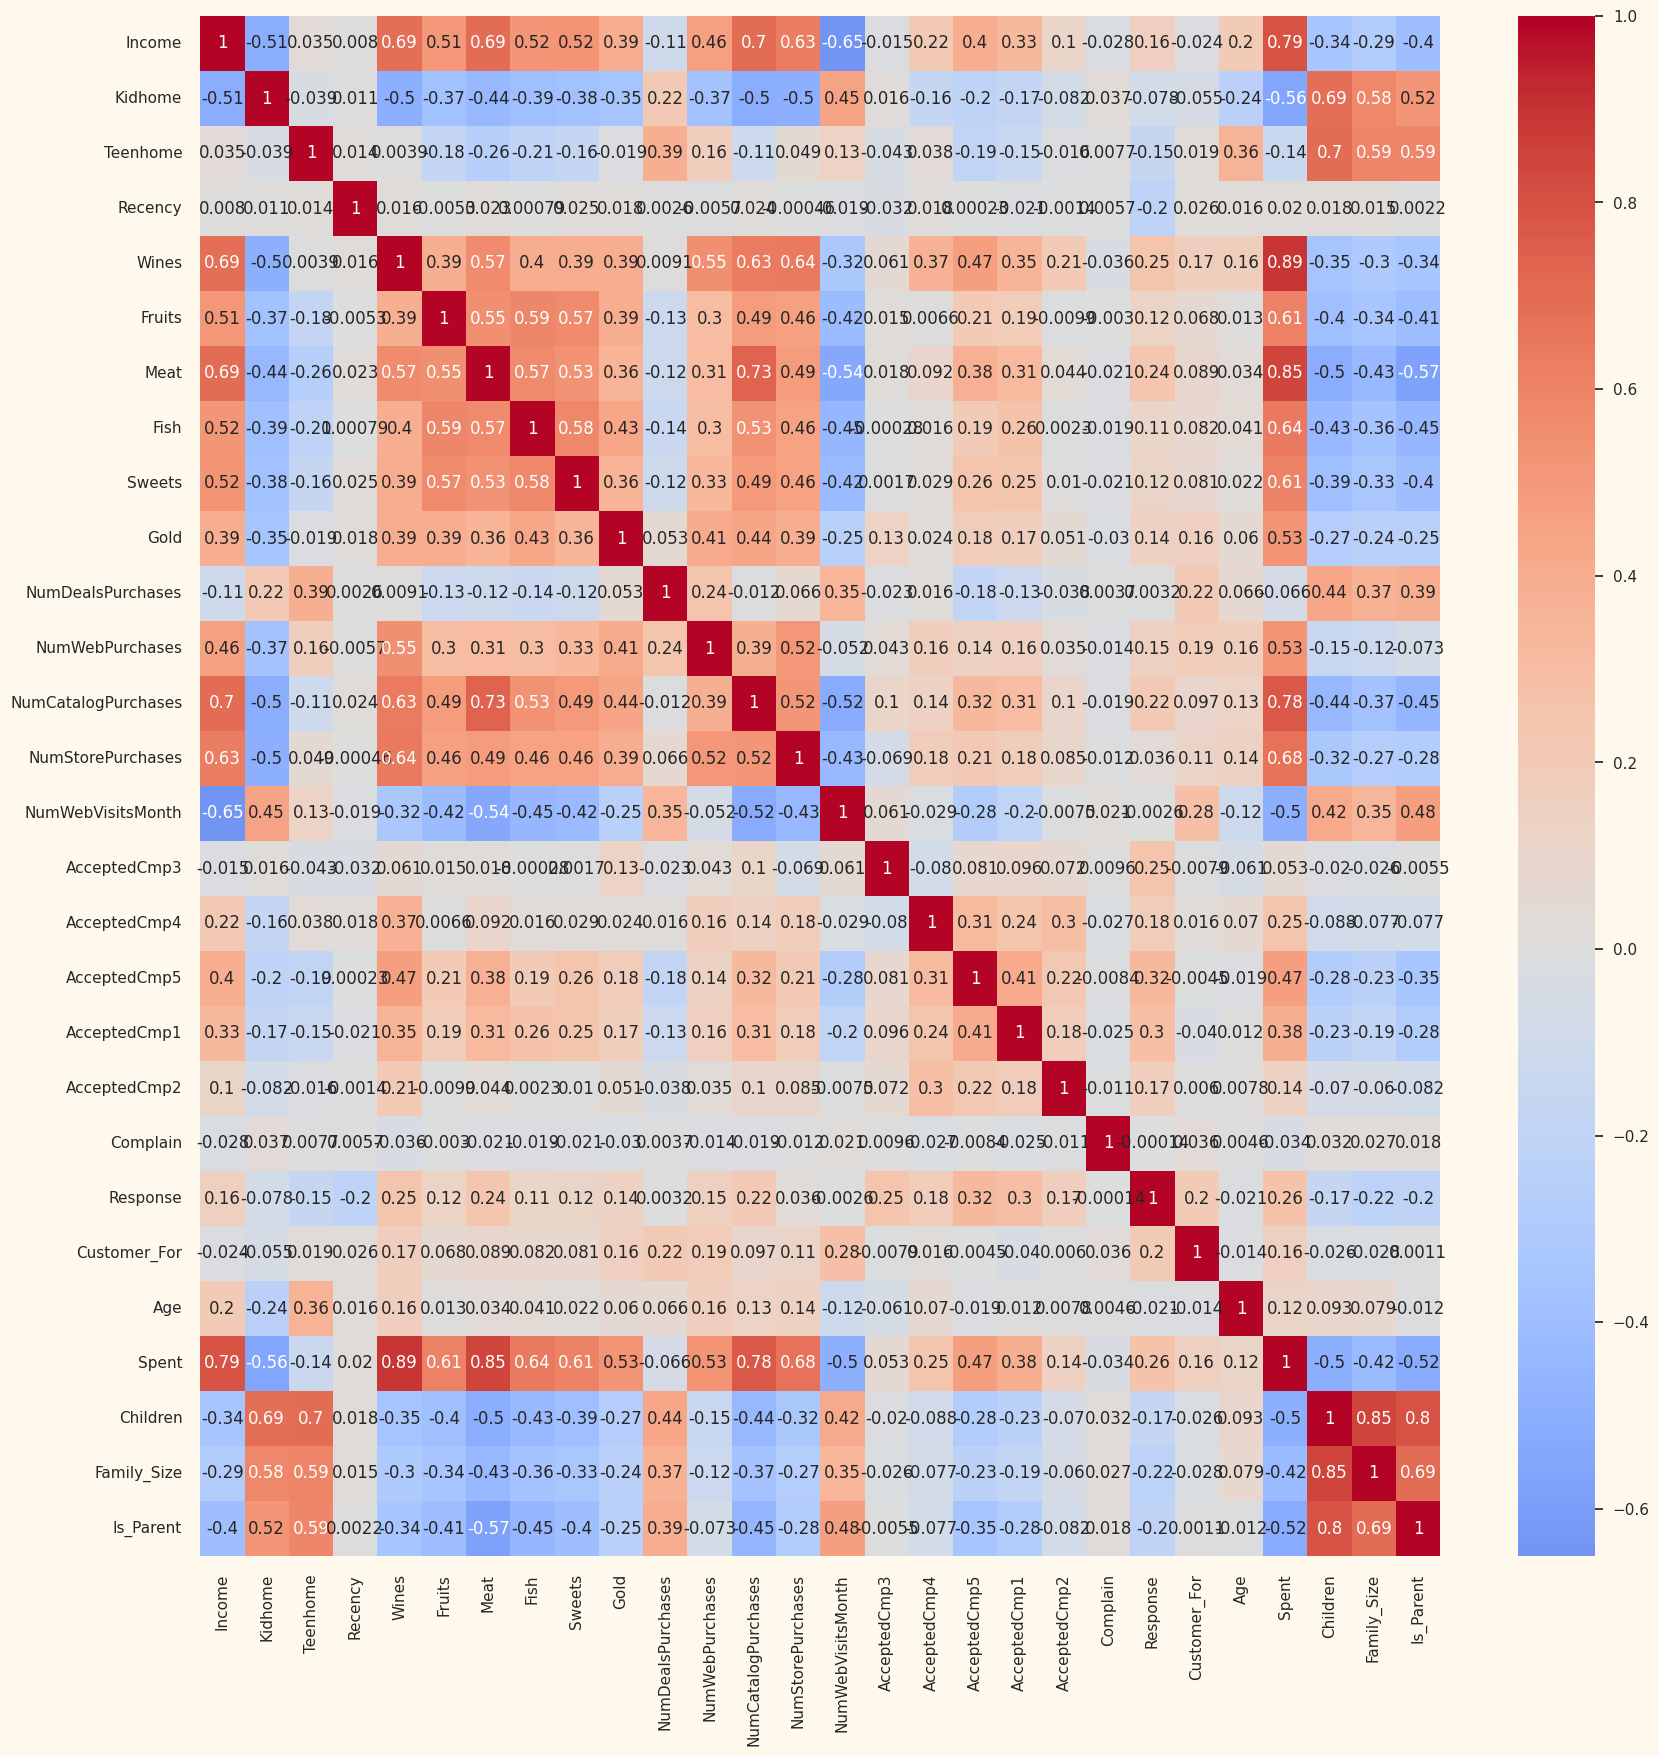

In [ ]:
data_numeric = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corrmat = data_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)
plt.show()

# **Data Preprocessing**

I engineered new features and transformed existing ones to enhance the dataset. This included creating new columns, simplifying categorical variables, and aggregating relevant metrics to better support the analysis.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [ ]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

# **Dimensionality Reduction**

To enhance the efficiency of classification, I will use **Principal Component Analysis (PCA)** to reduce the number of features in the dataset. This process simplifies the data by compressing it into fewer dimensions, making it easier to work with while retaining essential information.

**Steps:**
* Perform PCA to reduce dimensions
* Visualize the transformed data

In this project, I will reduce the dataset to 3 principal components to facilitate clearer analysis and interpretation.


In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -1.927331e-17  2.878602 -5.978123 -2.539470 -0.781595  2.386380   
col2  2212.0 -6.424437e-18  1.709469 -4.194757 -1.323932 -0.173716  1.234923   
col3  2212.0 -4.015273e-18  1.231685 -3.625184 -0.853556 -0.051292  0.863841   

           max  
col1  7.452915  
col2  6.168185  
col3  6.746845

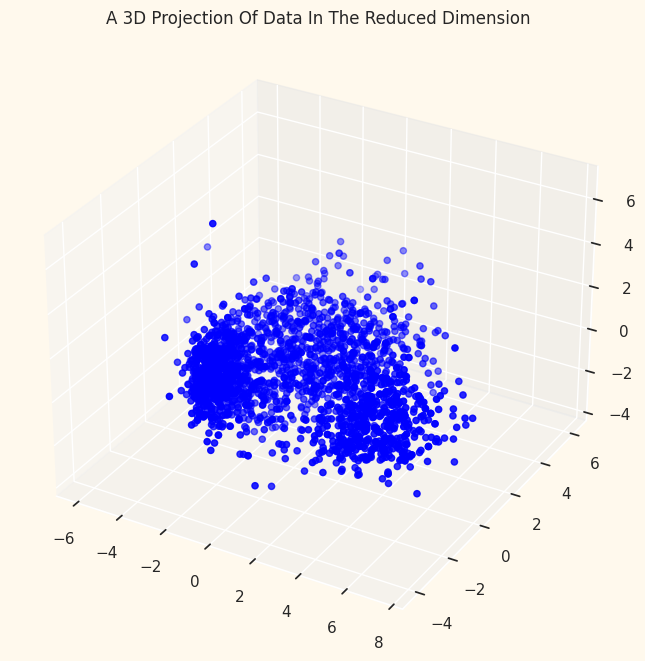

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **Clustering**

With the dataset simplified to three dimensions, I'll perform **Agglomerative Clustering**. This hierarchical method groups data by merging points until the desired number of clusters is reached.

**Steps:**
* Determine the optimal number of clusters using the Elbow Method
* Apply Agglomerative Clustering
* Visualize the results with a scatter plot


Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

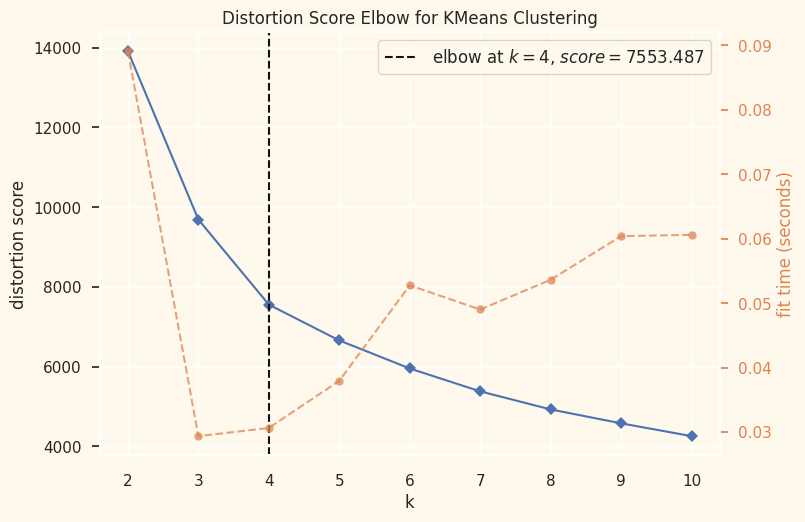

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data.
Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

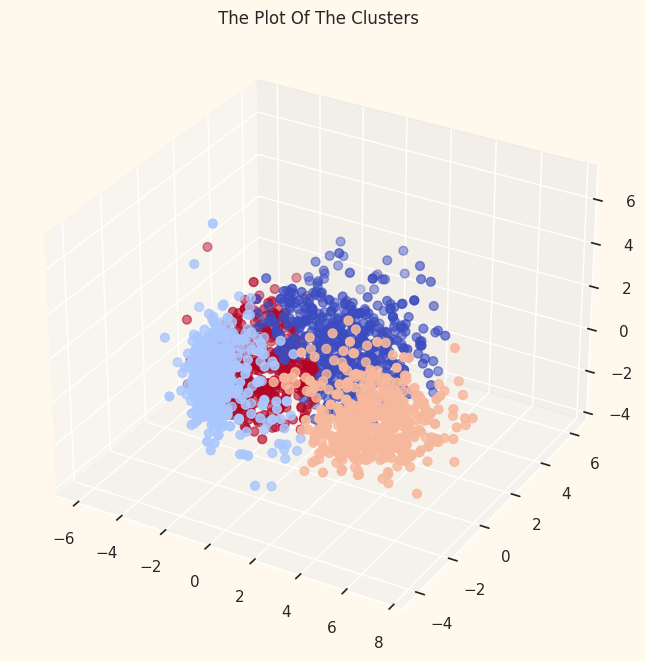

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'coolwarm' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# **EVALUATING MODELS**

We will be visualising data cause we have unsupervised model.

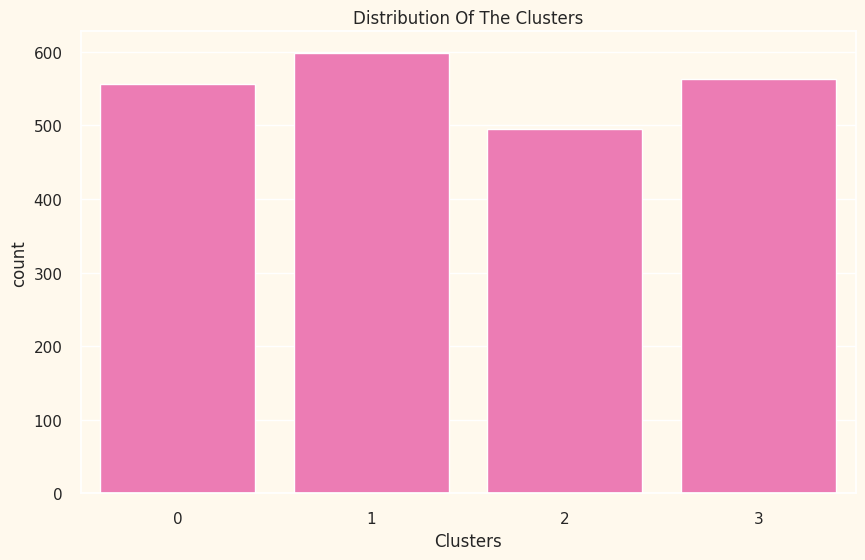

In [ ]:
color = "#FF69B4"


plt.figure(figsize=(10, 6))
pl = sns.countplot(x=data["Clusters"], color=color)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

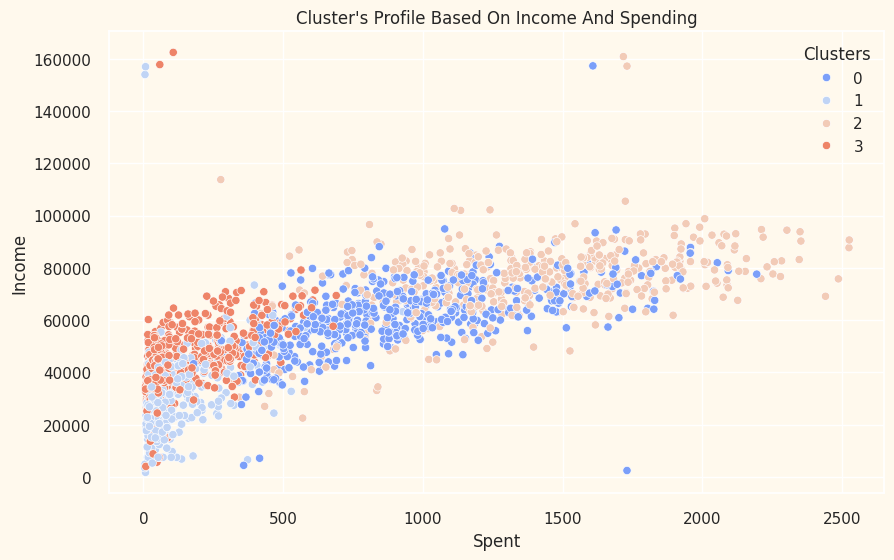

In [ ]:
palette = sns.color_palette("coolwarm", n_colors=len(data["Clusters"].unique()))

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
pl = sns.scatterplot(data=data, x="Spent", y="Income", hue="Clusters", palette=palette)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend(title="Clusters")
plt.show()

**Income vs. Spending Plot Reveals Cluster Patterns:**

- **Group 0:** High spending & average income
- **Group 1:** High spending & high income
- **Group 2:** Low spending & low income
- **Group 3:** High spending & low income

Next, I'll analyze the detailed distribution of clusters based on various products in the dataset, including: Wines, Fruits, Meat, Fish, Sweets, and Gold.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-33-e62d4b0320bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/ca

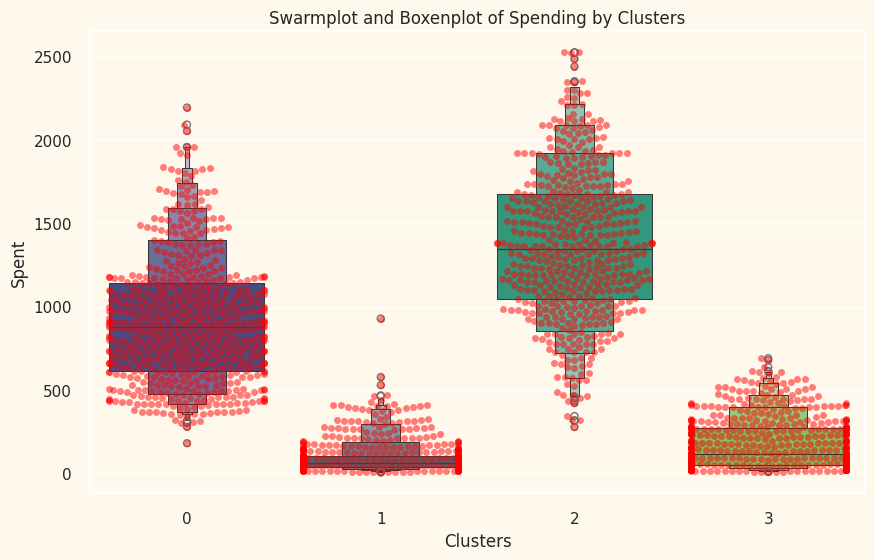

In [ ]:
palette = sns.color_palette("viridis", n_colors=len(data["Clusters"].unique()))
plt.figure(figsize=(10, 6))
sns.swarmplot(x=data["Clusters"], y=data["Spent"], color="#FF0000", alpha=0.5)
sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=palette)

plt.title("Swarmplot and Boxenplot of Spending by Clusters")
plt.show()

From the plot, it's evident that Cluster 1 comprises our largest customer group, closely followed by Cluster 0. We can delve into their spending patterns to tailor our targeted marketing strategies more effectively.

**Descriptive Analysis**

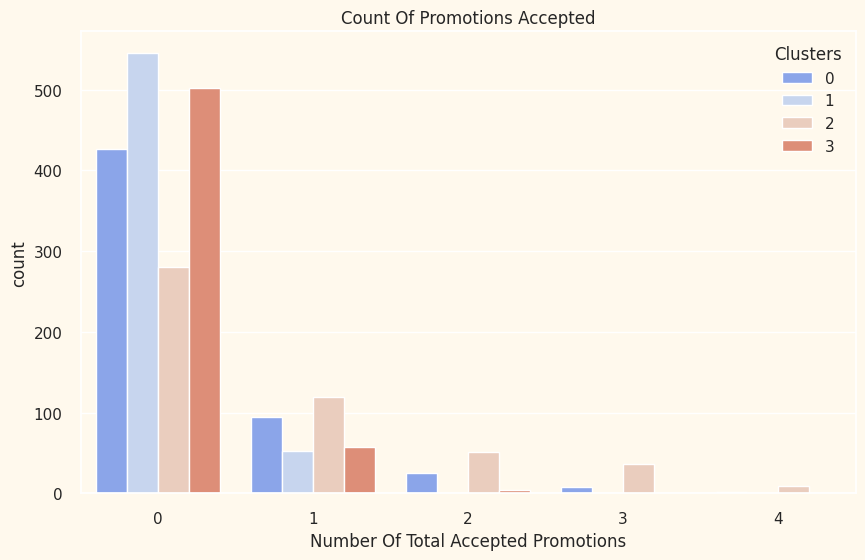

In [ ]:
palette = sns.color_palette("coolwarm", n_colors=len(data["Clusters"].unique()))

data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

# Plotting the count of total campaigns accepted
plt.figure(figsize=(10, 6))
pl = sns.countplot(x=data["Total_Promos"], hue=data["Clusters"], palette=palette)
pl.set_title("Count Of Promotions Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()


The response to the campaigns has been lukewarm, with very few participants overall and none engaging with all five campaigns. To enhance sales, more targeted and strategically planned campaigns might be needed.

<ipython-input-35-4f8d79e5e465>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(x=data["Clusters"], y=data["NumDealsPurchases"], palette=palette)


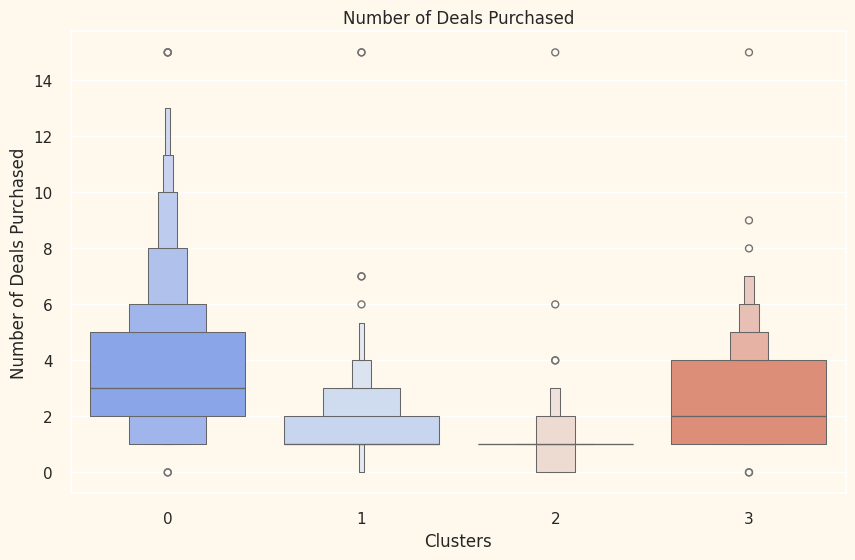

In [ ]:
palette = sns.color_palette("coolwarm", n_colors=len(data["Clusters"].unique()))

# Plotting the number of deals purchased
plt.figure(figsize=(10, 6))
pl = sns.boxenplot(x=data["Clusters"], y=data["NumDealsPurchases"], palette=palette)
pl.set_title("Number of Deals Purchased")
plt.xlabel("Clusters")
plt.ylabel("Number of Deals Purchased")
plt.show()


While the deals offered showed strong performance, particularly benefiting clusters 0 and 3, cluster 1, which includes our top customers, did not engage much with these deals. Additionally, cluster 2 did not exhibit a notable preference for the deals available.

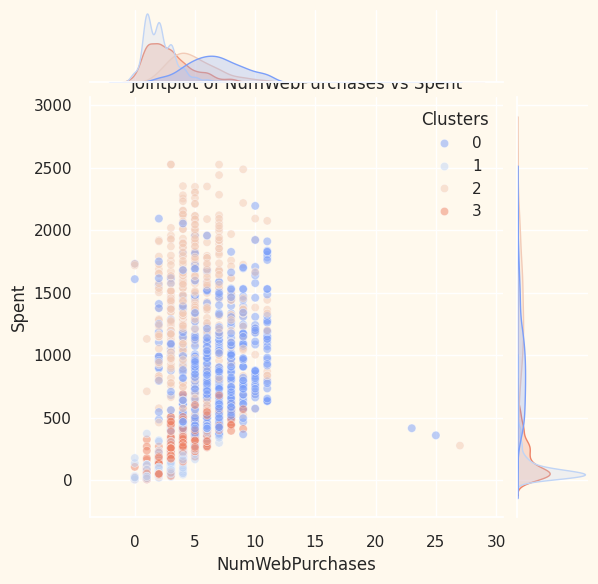

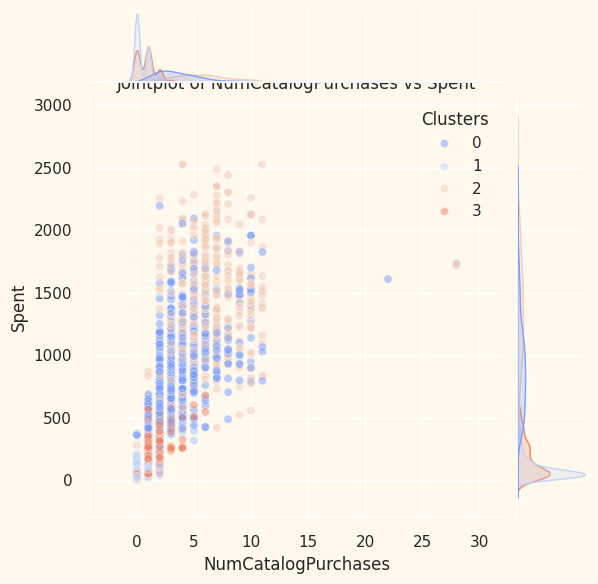

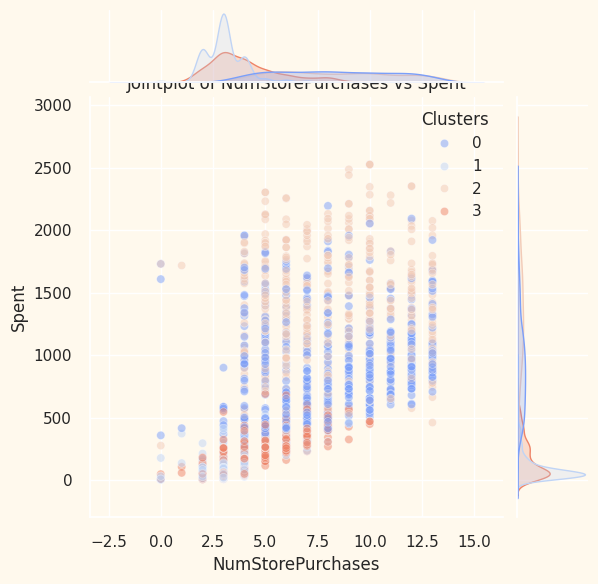

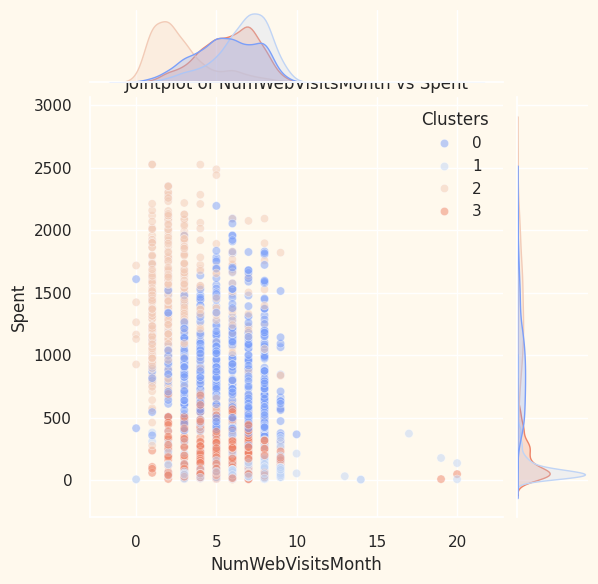

In [ ]:
palette = sns.color_palette("coolwarm", n_colors=len(data["Clusters"].unique()))

Places = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

for i in Places:
    # Plotting with jointplot
    g = sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], palette=palette, alpha=0.5)

    # Customize the scatterplot and kdeplot appearance
    g.ax_joint.legend(loc='upper right', title='Clusters')
    g.ax_joint.set_title(f'Jointplot of {i} vs Spent')

    plt.show()

# **Profiling**

Having created clusters and analyzed their purchasing behaviors, the next step is profiling. This involves examining key features to identify standout customers and those requiring more focus from the marketing team.

**Steps:**
- **Plot Personal Traits**: Visualize features that highlight individual characteristics within each cluster.
- **Draw Conclusions**: Use these insights to identify key customer segments and determine targeted marketing strategies.


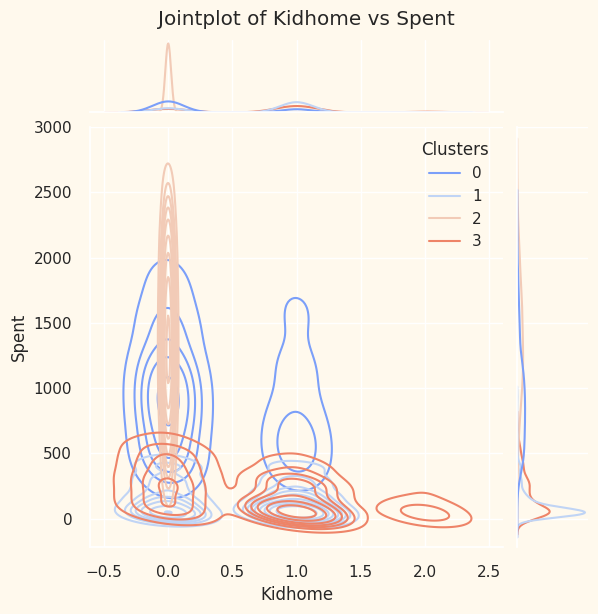

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


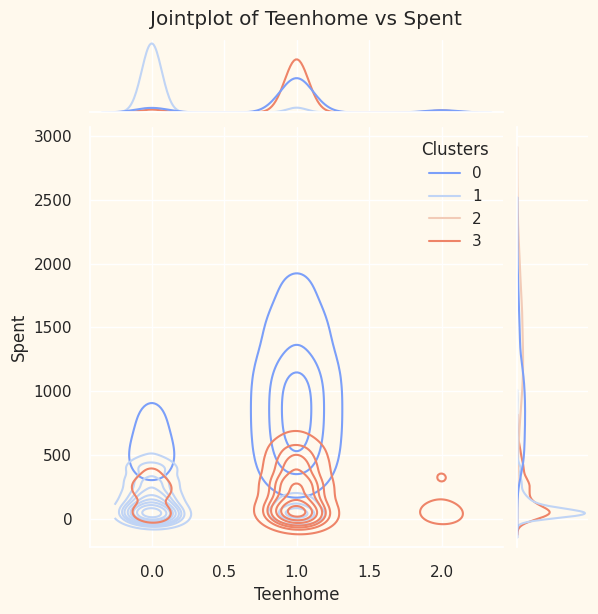

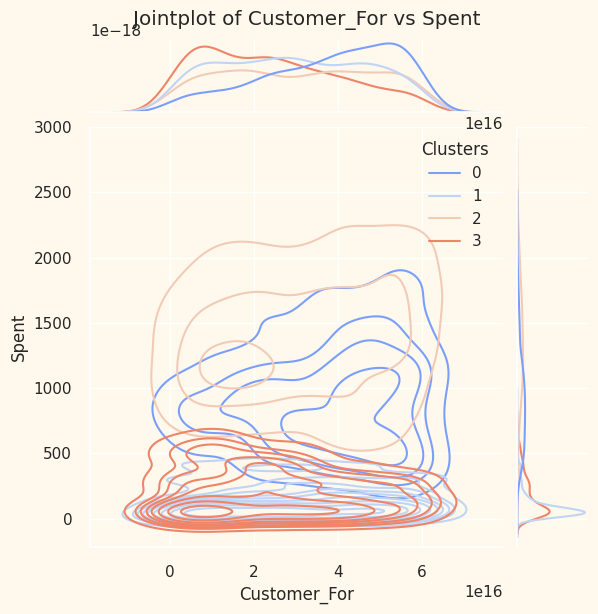

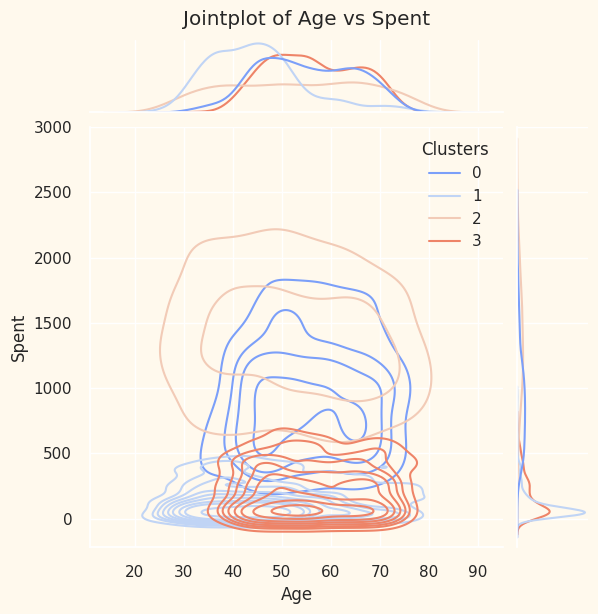

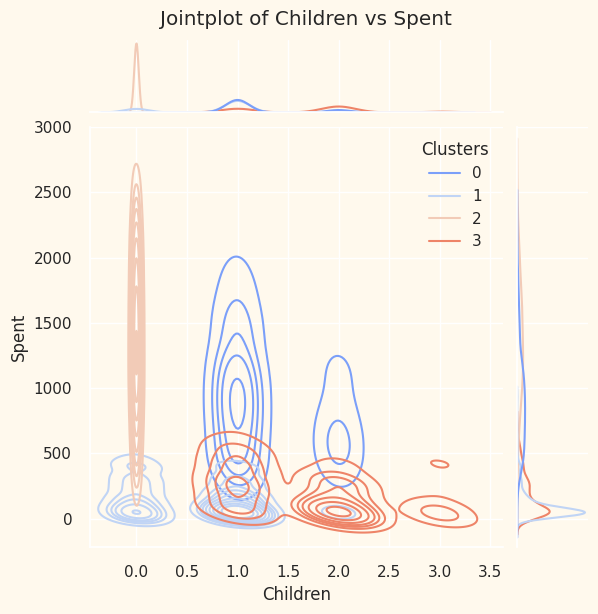

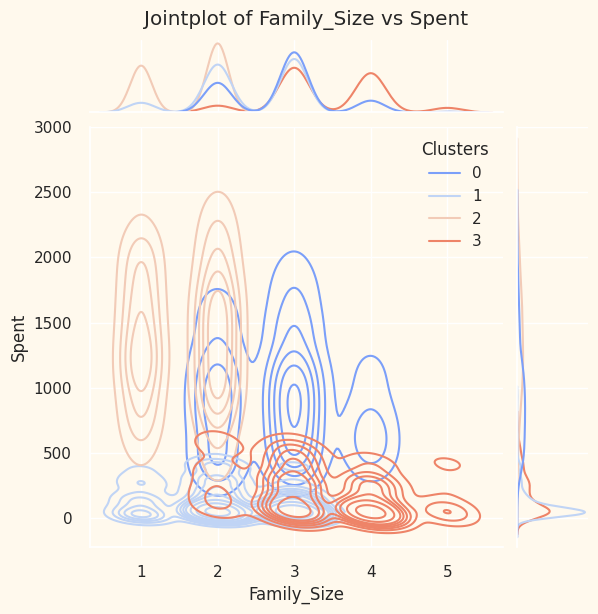

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


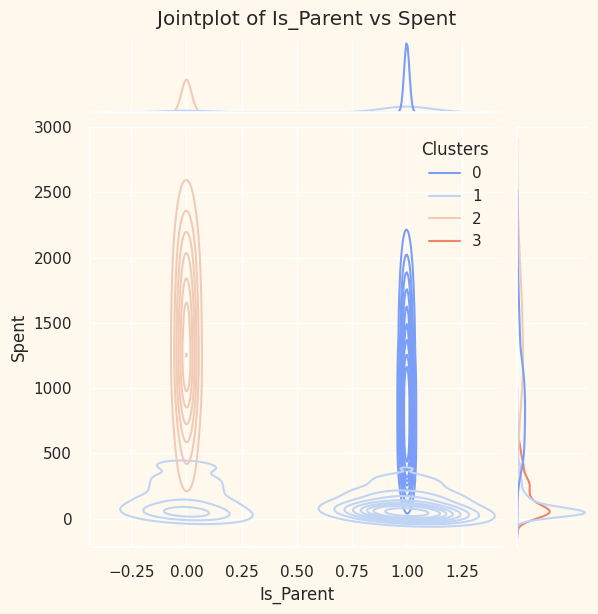

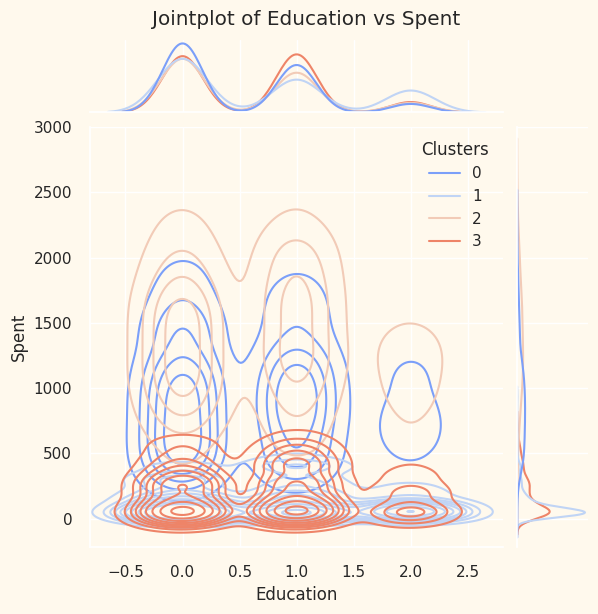

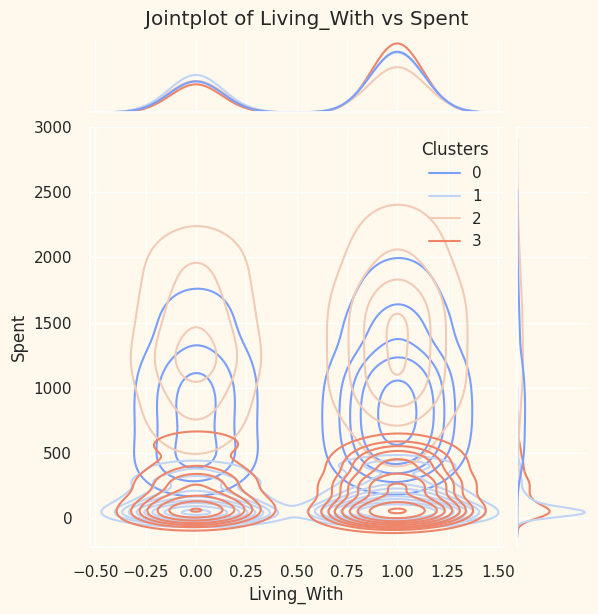

In [ ]:
palette = sns.color_palette("coolwarm", n_colors=len(data["Clusters"].unique()))

Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

for i in Personal:

    g = sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], kind="kde", palette=palette)
    g.fig.suptitle(f'Jointplot of {i} vs Spent', y=1.02)

    # Show the plot
    plt.show()


# **PROFILING THE CLUSTERS**

The following summary provides insights into the four clusters identified from the unsupervised clustering analysis:

**<span style="color:#1f77b4;">Cluster 0:</span>**
- **Parents:** Primarily parents
- **Family Size:** 2-4 members
- **Single Parents:** Many single parents
- **Teenagers:** Mostly have teenagers
- **Age:** Generally older

**<span style="color:#ff7f0e;">Cluster 1:</span>**
- **Parents:** Non-parents
- **Family Size:** Up to 2 members
- **Couples:** Predominantly couples
- **Age Range:** All ages represented
- **Income:** High income

**<span style="color:#2ca02c;">Cluster 2:</span>**
- **Parents:** Mostly parents
- **Family Size:** Up to 3 members
- **Children:** Mostly have one young child
- **Age:** Generally younger

**<span style="color:#d62728;">Cluster 3:</span>**
- **Parents:** Parents
- **Family Size:** 2-5 members
- **Teenagers:** Mostly have teenagers
- **Age:** Generally older
- **Income:** Lower income


In [ ]:
!pip install sweetviz

import sweetviz as sv
report = sv.analyze(data)

# Display the report
report.show_html('processed_data_of_customer_segmentation_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report processed_data_of_customer_segmentation_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# **CONCLUSION**

In this project, I performed unsupervised clustering.
I did use dimensionality reduction followed by agglomerative clustering.
I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending.
This can be used in planning better marketing strategies.

